In [22]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [24]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [25]:
df.isna().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [26]:
x = df.drop(columns=['Survived'])
y =df.Survived

In [27]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
x_train['Age_new'] = x_train.Age

In [29]:
x_test["Age_new"] = x_test.Age

In [30]:
x_test

,Age,Fare,Age_new
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0
...,...,...,...
433,17.0,7.1250,17.0
773,NaN,7.2250,NaN
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0


In [31]:
# age_values_train = x_train['Age'].dropna()
# x_train.loc[x_train['Age_new'].isna(), 'Age_new'] = np.random.choice(age_values_train, size=x_train['Age_new'].isna().sum(), replace=True)

# age_values_test = x_test['Age'].dropna()
# x_test.loc[x_test['Age_new'].isna(), 'Age_new'] = np.random.choice(age_values_test, size=x_test['Age_new'].isna().sum(), replace=True)

The "Data Leakage" Trap
In your current code, you are calculating age_values_test from x_test['Age'].

In a real-world scenario, you shouldn't know anything about the distribution of your test set. By using values from the test set to fill gaps in the test set, you are technically allowing information from your "future" data to leak into your processing.

The fix: Usually, you should use the values from x_train to fill the gaps in both the training and the testing sets. This ensures your model is only learning from the data it’s allowed to see.

In [32]:
x_train

,Age,Fare,Age_new
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


Alternative Way

In [33]:
# 1. Get the pool from TRAIN only
age_pool = x_train['Age'].dropna()

# 2. Fill Train
train_missing_count = x_train['Age_new'].isna().sum()
x_train.loc[x_train['Age_new'].isna(), 'Age_new'] = np.random.choice(age_pool, size=train_missing_count)

# 3. Fill Test using the pool from TRAIN
test_missing_count = x_test['Age_new'].isna().sum()
x_test.loc[x_test['Age_new'].isna(), 'Age_new'] = np.random.choice(age_pool, size=test_missing_count)

In [36]:
x_train.Age_new.isna().sum() == x_train.Age.isna().sum()

np.False_

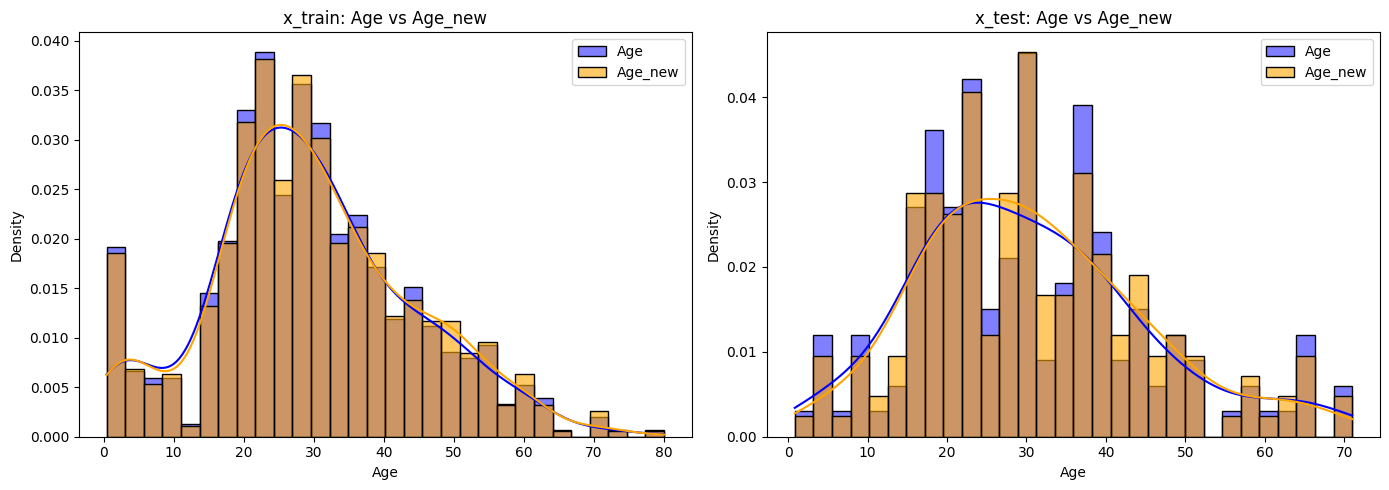

In [41]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# x_train distributions
plt.subplot(1, 2, 1)
sns.histplot(x_train['Age'], kde=True, color='blue', label='Age', stat='density', bins=30 )
sns.histplot(x_train['Age_new'], kde=True, color='orange', label='Age_new', stat='density', bins=30, alpha=0.6 )
plt.title('x_train: Age vs Age_new')
plt.legend()

# x_test distributions
plt.subplot(1, 2, 2)
sns.histplot(x_test['Age'], kde=True, color='blue', label='Age', stat='density', bins=30)
sns.histplot(x_test['Age_new'], kde=True, color='orange', label='Age_new', stat='density', bins=30, alpha=0.6)
plt.title('x_test: Age vs Age_new')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
x_train.Age.var()

np.float64(210.2517072477435)

In [43]:
x_train.Age_new.var()

np.float64(212.8610671028303)

In [49]:
x_train[["Age", "Fare" ]].cov()

,Age,Fare
Age,210.251707,71.580633
Fare,71.580633,2700.831981


In [51]:
x_train[["Age_new" , "Fare"]].cov()

,Age_new,Fare
Age_new,212.861067,50.222890
Fare,50.222890,2700.831981


<Axes: >

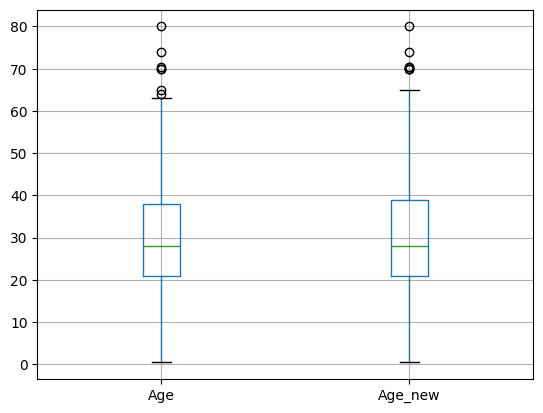

In [52]:
x_train[["Age" , "Age_new"]].boxplot()

In [56]:
df2 = pd.read_csv('house-train.csv',usecols=['GarageQual' ,'FireplaceQu'  , 'SalePrice'])

In [57]:
df2.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [59]:
df2.isna().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [60]:
x = df2 
y =df2.SalePrice

In [61]:
x_train, x_test , y_train ,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [62]:
x_train['fire_new'] = x_train.FireplaceQu
x_train['garage_new'] = x_train.GarageQual
x_test['fire_new']  = x_test.FireplaceQu
x_test['garage_new']= x_train.GarageQual

In [63]:
x_train

,FireplaceQu,GarageQual,SalePrice,fire_new,garage_new
254,NaN,TA,145000,NaN,TA
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,Gd,TA
...,...,...,...,...,...
1095,Gd,TA,176432,Gd,TA
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,NaN,TA
860,Gd,TA,189950,Gd,TA


In [64]:
# 1. Get pools from TRAIN only (excluding missing values)
fireplace_pool = x_train['FireplaceQu'].dropna()
garage_pool = x_train['GarageQual'].dropna()

# 2. Fill missing in x_train using its own columns
x_train.loc[x_train['fire_new'].isna(), 'fire_new'] = np.random.choice(fireplace_pool, size=x_train['fire_new'].isna().sum())
x_train.loc[x_train['garage_new'].isna(), 'garage_new'] = np.random.choice(garage_pool, size=x_train['garage_new'].isna().sum())

# 3. Fill missing in x_test using pools from TRAIN
x_test.loc[x_test['fire_new'].isna(), 'fire_new'] = np.random.choice(fireplace_pool, size=x_test['fire_new'].isna().sum())
x_test.loc[x_test['garage_new'].isna(), 'garage_new'] = np.random.choice(garage_pool, size=x_test['garage_new'].isna().sum())

In [66]:
x_test.isna().sum()

FireplaceQu    143
GarageQual      17
SalePrice        0
fire_new         0
garage_new       0
dtype: int64